In [1]:
%matplotlib inline
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib
sns.set_style('whitegrid')
sns.set_palette('colorblind')


methods = ['MAP-plain', 'MAP-oe', 'DE-plain', 
           'LLVB-plain', 'LLVB-noneclass', 'LLVB-dirlik', 'LLVB-mixed', 'LLVB-oe',
           'DLA-plain', 'DLA-noneclass', 'DLA-dirlik', 'DLA-mixed', 'DLA-oe']
method2str = {
    'MAP-plain': 'MAP', 'MAP-oe': 'OE', 'DE-plain': 'DE',
    #
    'DLA-plain': 'LA', 'DLA-dirlik': 'LA+SL', 'DLA-mixed': 'LA+ML', 'DLA-oe': 'LA+OE',
    'DLA-noneclass': 'LA+NC', 'DLA-noneclass-extra': 'LA+NC-2',
    #
    'LLVB-plain': 'VB', 'LLVB-dirlik': 'VB+SL', 'LLVB-oe': 'VB+OE',
    'LLVB-mixed': 'VB+ML', 'LLVB-noneclass': 'VB+NC', 'LLVB-noneclass-extra': 'VB+NC-2',
}
metric2str = {'acc': 'Acc.', 'mmc': 'MMC', 'ece': 'ECE',
              'brier': 'Brier', 'loglik': 'NLL'}

path = f'../results/CIFAR-10-C/imagenet'

N = 10000  # n test points


def plot(metric='ece', fig_one=False):
    metric_str = metric2str[metric]
    data = {'Method': [], 'Severity': [], metric_str: []}

    for method in methods:
        vals = np.load(f'{path}/{metric}.npy', allow_pickle=True).item()

        for distortion in vals[method].keys():
            if distortion == 'clean':
                continue

            for severity in vals[method][distortion].keys():
                data['Method'].append(method2str[method])
                data['Severity'].append(int(severity))
                
                val = vals[method][distortion][severity][0]

                if metric == 'loglik':
                    val /= -N
                    
                data[metric_str].append(val)


    df = pd.DataFrame(data)

    if fig_one:
        df = df[df['Method'].isin(['DE', 'OE', 'VB', 'LA'])]
        sns.boxplot(data=df, x='Severity', y=metric_str, hue='Method', showfliers=0, width=0.5, linewidth=1)
    else:
        sns.boxplot(data=df, x='Severity', y=metric_str, hue='Method', showfliers=0, 
                    width=0.7, linewidth=1, palette='tab20')
    
    plt.title(metric_str)
    tikzplotlib.save(f'figs/{"fig1_" if fig_one else ""}cifar10c_{metric}.tex')
    plt.show()

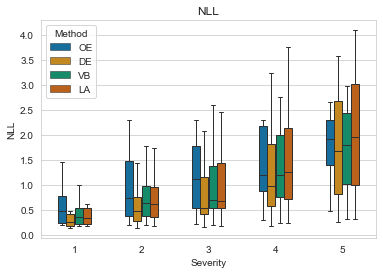

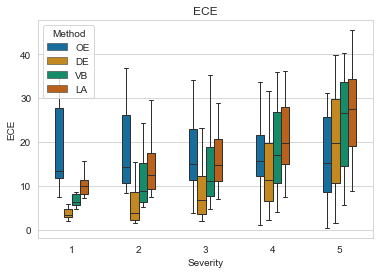

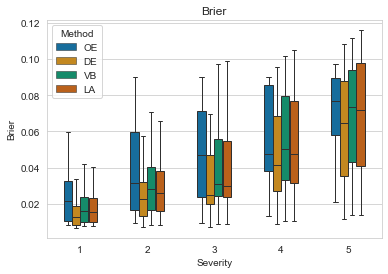

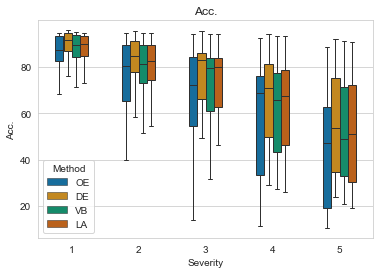

In [5]:
plot(metric='loglik', fig_one=True)
plot(metric='ece', fig_one=True)
plot(metric='brier', fig_one=True)
plot(metric='acc', fig_one=True)

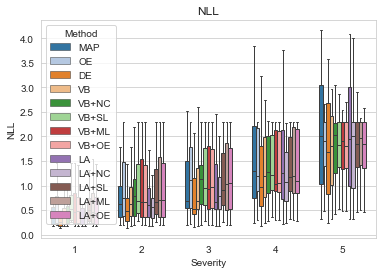

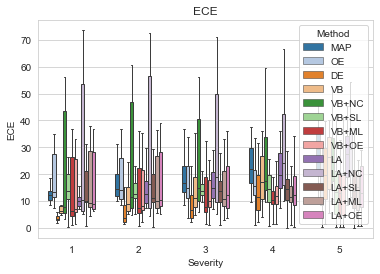

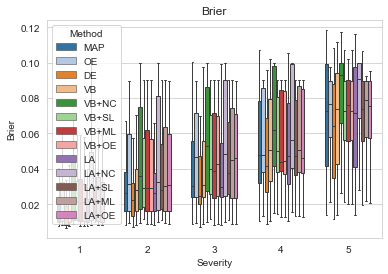

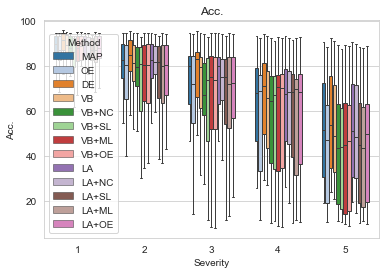

In [6]:
plot(metric='loglik', fig_one=False)
plot(metric='ece', fig_one=False)
plot(metric='brier', fig_one=False)
plot(metric='acc', fig_one=False)

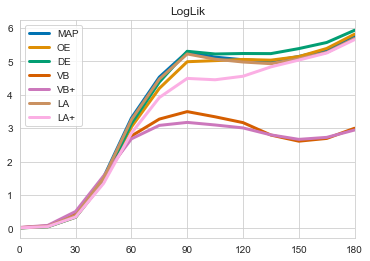

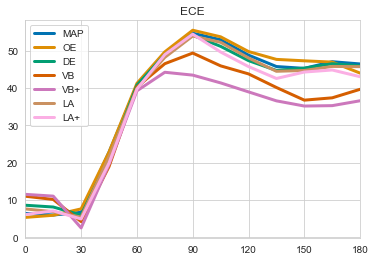

In [24]:
%matplotlib inline
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib
sns.set_palette('colorblind')


methods = ['MAP-plain', 'MAP-oe', 'DE-plain', 'LLVB-plain', 'LLVB-mixed', 'DLA-plain', 'DLA-mixed']
method2str = {
    'MAP-plain': 'MAP', 'MAP-oe': 'OE', 'DE-plain': 'DE', 'DLA-plain': 'LA', 'DLA-mixed': 'LA+',
    'LLVB-plain': 'VB', 'LLVB-mixed': 'VB+'
}
metric2str = {'acc': 'Acc.', 'mmc': 'MMC', 'ece': 'ECE',
              'brier': 'Brier', 'loglik': 'LogLik'}

path = f'../results/rot-MNIST/imagenet'

N = 8000  # n test points


def plot(metric='ece'):
    metric_str = metric2str[metric]
    data = {'Method': [], 'Severity': [], metric_str: []}
    
    x = list(range(0, 181, 15))
    vals = np.load(f'{path}/{metric}.npy', allow_pickle=True).item()

    for method in methods:
        v = vals[method]
        y = [v[str(angle)][0] for angle in x]
        
        if metric == 'loglik':
            y = [-yy/N for yy in y]
        
        plt.plot(x, y, lw=3, label=method2str[method], alpha=1)

    ticks = range(0, 181, 30)
    plt.xticks(ticks)
    plt.xlim(0, 180)
    plt.legend()

    plt.title(metric_str)
    tikzplotlib.save(f'figs/mnistr_{metric}.tex')
    plt.show()
    
    
plot(metric='loglik')
plot(metric='ece')